In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

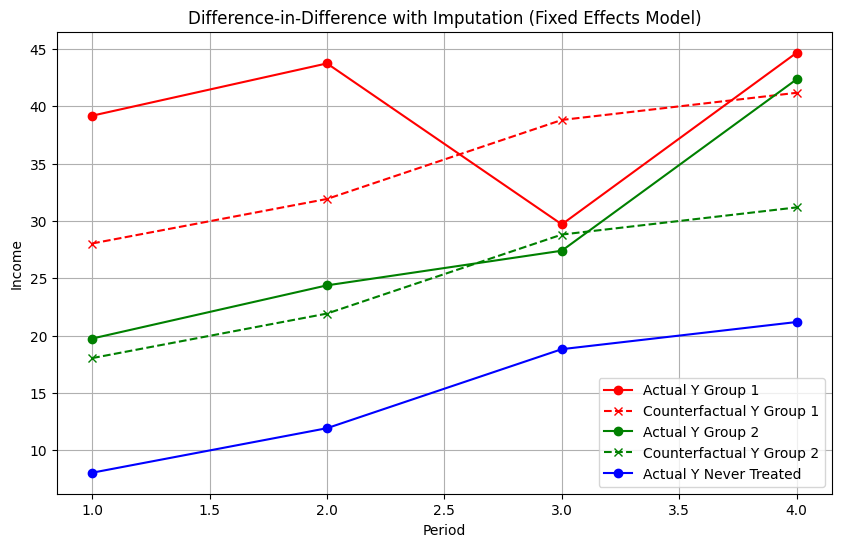

,Period,Group,Actual_Y,Counterfactual_Y
0,1,1,39.180059,28.029122
1,2,1,43.742385,31.914435
2,3,1,29.698467,38.809511
3,4,1,44.675204,41.179318
4,1,2,19.735308,18.029122
5,2,2,24.377318,21.914435
6,3,2,27.400763,28.809511
7,4,2,42.358810,31.179318
8,1,Never Treated,8.029122,None
9,2,Never Treated,11.914435,None


In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Number of individuals in each group
n = 5

# Number of periods
T = 4

# Generate the fake data and counterfactuals as in the previous steps
intercept_group_1 = 30
intercept_group_2 = 20
intercept_group_3 = 10
treatment_effect_group_1 = np.array([0, 0, 10, 20])
treatment_effect_group_2 = np.array([0, 0, 0, 15])
treatment_effect_group_3 = np.array([0, 0, 0, 0])
time_fixed_effect_group = np.array([0, 5, 7, 9])

group_1 = np.array([intercept_group_1 + treatment_effect_group_1[t] + time_fixed_effect_group[t] + np.random.normal(0, 20, n) for t in range(T)])
group_2 = np.array([intercept_group_2 + treatment_effect_group_2[t] + time_fixed_effect_group[t] + np.random.normal(0, 2, n) for t in range(T)])
group_3 = np.array([intercept_group_3 + treatment_effect_group_3[t] + time_fixed_effect_group[t] + np.random.normal(0, 10, n) for t in range(T)])  

counterfactual_1 = np.array([intercept_group_1 - intercept_group_3 + group_3[t] for t in range(T)])  
counterfactual_2 = np.array([intercept_group_2 - intercept_group_3 + group_3[t] for t in range(T)])  

# Create the DataFrame for plotting
data = {
    'Period': np.tile(np.array([1, 2, 3, 4]), 3),
    'Group': np.repeat(['1', '2', 'Never Treated'], 4),
    'Actual_Y': np.concatenate([np.mean(group_1, axis=1), np.mean(group_2, axis=1), np.mean(group_3, axis=1)]),
    'Counterfactual_Y': np.concatenate([np.mean(counterfactual_1, axis=1), np.mean(counterfactual_2, axis=1), np.repeat(None, 4)]),
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
for group, color in zip(['1', '2'], ['r', 'g']):  # Removed '3' to not plot counterfactual for group 3
    subset = df[df['Group'] == group]
    plt.plot(subset['Period'], subset['Actual_Y'], label=f'Actual Y Group {group}', marker='o', linestyle='-', color=color)
    plt.plot(subset['Period'][subset['Counterfactual_Y'].notna()], subset['Counterfactual_Y'].dropna(), label=f'Counterfactual Y Group {group}', marker='x', linestyle='--', color=color)

# Adding the Actual Y for Group 3 (without counterfactual)
plt.plot(df[df['Group'] == 'Never Treated']['Period'], df[df['Group'] == 'Never Treated']['Actual_Y'], label=f'Actual Y Never Treated', marker='o', linestyle='-', color='b')

plt.xlabel('Period')
plt.ylabel('Income')
plt.title('Difference-in-Difference with Imputation (Fixed Effects Model)')
plt.legend()
plt.grid(True)
plt.show()

# Display the DataFrame for reference
df